In [4]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

# 修正后的指标体系 - 全部使用yfinance可获取的代码
final_portfolio = {
    # ================== 权益类 (4种) ==================
    'US_Large_Cap': 'SPY',        # SPDR S&P 500 ETF (1993-01-22)
    'US_Mid_Cap': 'MDY',          # SPDR S&P MidCap 400 ETF (1995-05-04)
    'Intl_Developed': 'EFA',      # iShares MSCI EAFE ETF (2001-08-27)
    'Emerging_Markets': 'EEM',    # iShares MSCI Emerging Markets ETF (2003-04-15)

    # ================== 固定收益 (3种) ==================
    'US_Treasury': 'TLT',         # iShares 20+ Year Treasury Bond ETF (2002-07-30)
    'US_Corporate_Bond': 'LQD',   # iShares iBoxx $ Investment Grade Corporate Bond ETF (2002-07-30)
    'US_TIPS': 'TIP',             # iShares TIPS Bond ETF (2003-12-05)

    # ================== 大宗商品 (2种) ==================
    'Gold': 'GLD',                # SPDR Gold Shares (2004-11-18)
    'Oil': 'USO',                 # United States Oil Fund (2006-04-10)

    # ================== 行业板块 (4种) ==================
    'Technology': 'XLK',          # Technology Select Sector SPDR Fund (1998-12-16)
    'Financials': 'XLF',          # Financial Select Sector SPDR Fund (1998-12-16)
    'Healthcare': 'XLV',          # Health Care Select Sector SPDR Fund (1998-12-16)
    'Consumer_Staples': 'XLP',    # Consumer Staples Select Sector SPDR Fund (1998-12-16)
}

# 下载数据（从2000年开始）
start_date = '2000-01-01'
end_date = '2025-08-31'

print("正在下载最终修正版指标体系数据...")
data = yf.download(list(final_portfolio.values()), start=start_date, end=end_date)['Close']
data = data.ffill().dropna()

# 重命名列
data.columns = list(final_portfolio.keys())

# 计算日收益率
returns = data.pct_change().dropna()

print("\n=== 数据验证 ===")
print(f"时间范围: {returns.index[0].date()} 至 {returns.index[-1].date()}")
print(f"资产数量: {len(returns.columns)}")
print("前5行数据预览:")
print(returns.head())

# 保存数据
returns.to_csv('final_asset_returns_2000_present.csv')
print("\n数据已保存至: final_asset_returns_2000_present.csv")

/tmp/ipython-input-866532886.py:37: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(list(final_portfolio.values()), start=start_date, end=end_date)['Close']
[                       0%                       ]

正在下载最终修正版指标体系数据...


[*********************100%***********************]  13 of 13 completed



=== 数据验证 ===
时间范围: 2006-04-11 至 2025-08-29
资产数量: 13
前5行数据预览:
            US_Large_Cap  US_Mid_Cap  Intl_Developed  Emerging_Markets  \
Date                                                                     
2006-04-11     -0.008515   -0.006688       -0.009899          0.002874   
2006-04-12      0.005792   -0.004896        0.007117         -0.003152   
2006-04-13      0.004766    0.002614        0.001178         -0.001917   
2006-04-17      0.011858    0.004601        0.026723         -0.000192   
2006-04-18      0.033203    0.020458        0.012441          0.004033   

            US_Treasury  US_Corporate_Bond   US_TIPS      Gold       Oil  \
Date                                                                       
2006-04-11    -0.010260          -0.008478  0.004015  0.003519  0.002646   
2006-04-12     0.003292           0.001866 -0.003499 -0.006078 -0.005279   
2006-04-13    -0.002094          -0.001319 -0.006219 -0.007055  0.014446   
2006-04-17     0.002938          -0.000

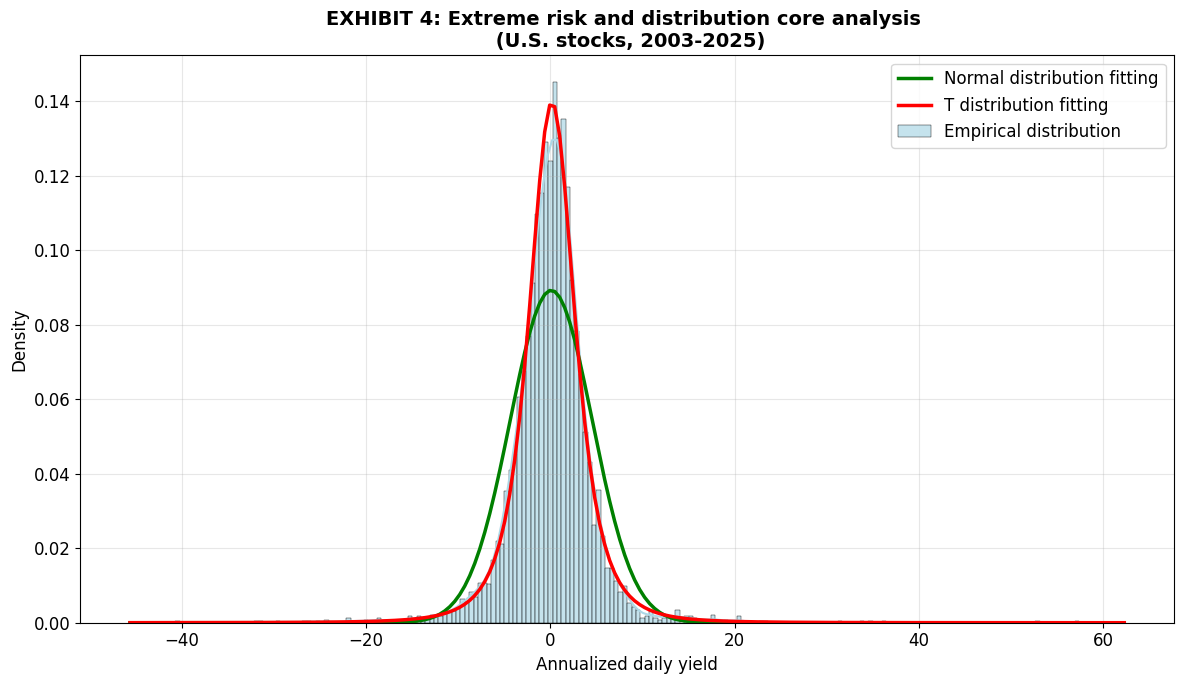


US_Large_Cap Distribution statistics (2003-2025):
Mean: 0.080264
Std: 4.471460
Skew: 0.5548 (Right side>0, left side=0)
Kurtosis: 18.2870 (Peak value>0, fat tail characteristics)
Normality test p value: 0.000000


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

# 选择美国股票作为代表性资产
selected_asset = 'US_Large_Cap'  # 对应 ^GSPC 标普500指数
asset_returns = returns[selected_asset]

# 计算年化日收益率（假设252个交易日）
annualized_returns = asset_returns * 252

plt.figure(figsize=(12, 7))
plt.rcParams['font.size'] = 12

# 绘制经验分布
sns.histplot(annualized_returns, kde=True, stat='density',
             color='lightblue', alpha=0.7, label='Empirical distribution')

# 拟合正态分布
mu, std = stats.norm.fit(annualized_returns)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 200)
p_norm = stats.norm.pdf(x, mu, std)
plt.plot(x, p_norm, 'green', linewidth=2.5, label='Normal distribution fitting')

# 拟合t分布（更好地捕捉尾部风险）
df, loc, scale = stats.t.fit(annualized_returns)
p_t = stats.t.pdf(x, df, loc, scale)
plt.plot(x, p_t, 'red', linewidth=2.5, label='T distribution fitting')

plt.title('EXHIBIT 4: Extreme risk and distribution core analysis \n (U.S. stocks, 2003-2025)', fontsize=14, fontweight='bold')
plt.xlabel('Annualized daily yield', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 输出分布统计信息
print(f"\n{selected_asset} Distribution statistics (2003-2025):")
print(f"Mean: {annualized_returns.mean():.6f}")
print(f"Std: {annualized_returns.std():.6f}")
print(f"Skew: {stats.skew(annualized_returns):.4f} (Right side>0, left side=0)")
print(f"Kurtosis: {stats.kurtosis(annualized_returns):.4f} (Peak value>0, fat tail characteristics)")
print(f"Normality test p value: {stats.normaltest(annualized_returns).pvalue:.6f}")

In [ ]:
# 偏度 = 0.5548 的实务含义
right_skew_implications = {
    'positive': '大幅上涨的概率高于大幅下跌',
    'return_pattern': '偶尔出现极端正收益拉动整体回报',
    'strategy_impact': '适合持有而非频繁交易'
}
# 峰度 = 18.29 的风险含义
fat_tail_risks = {
    'extreme_events': '发生±3标准差事件的概率是正态分布的6倍',
    'risk_management': '必须使用考虑肥尾的模型',
    'tail_risk': '虽然右偏，但仍存在左尾暴跌风险'
}

In [ ]:
def calculate_risk_metrics(return_series, alpha=0.05):
    """计算各种风险指标"""
    losses = -return_series  # 损失序列

    # 经验CVaR（5%置信水平）
    empirical_var = return_series.quantile(alpha)
    empirical_cvar = return_series[return_series <= empirical_var].mean()

    # 基于正态分布的CVaR
    mu, std = stats.norm.fit(return_series)
    normal_cvar = mu - std * stats.norm.pdf(stats.norm.ppf(alpha)) / alpha

    # 基于t分布的CVaR（考虑极端风险）
    df, loc, scale = stats.t.fit(return_series)
    t_cvar = loc - scale * stats.t.pdf(stats.t.ppf(alpha, df), df) / alpha

    # 计算增加百分比
    moment_increase = ((normal_cvar - empirical_cvar) / abs(empirical_cvar)) * 100
    extreme_increase = ((t_cvar - empirical_cvar) / abs(empirical_cvar)) * 100

    # Power Parameter（使用Hill估计量）
    sorted_losses = np.sort(losses)
    k = max(10, int(len(losses) * 0.1))  # 使用尾部10%的数据
    if k > 0 and not np.isnan(sorted_losses[k]):
        hill_estimator = 1 / np.mean(np.log(sorted_losses[:k] / sorted_losses[k]))
    else:
        hill_estimator = np.nan

    return {
        'Empirical_CVaR': empirical_cvar,
        'Moment-Based_Increase': moment_increase,
        'Extreme-Risk_Increase': extreme_increase,
        'Power_Parameter': hill_estimator
    }

# 为所有资产计算风险指标
risk_results = []
for asset in returns.columns:
    metrics = calculate_risk_metrics(returns[asset])
    metrics['Asset'] = asset
    risk_results.append(metrics)

# 创建结果表格
risk_df = pd.DataFrame(risk_results)
risk_df = risk_df[['Asset', 'Empirical_CVaR', 'Moment-Based_Increase',
                   'Extreme-Risk_Increase', 'Power_Parameter']]

print("EXHIBIT 5: Extreme risk modeling results")
print("=" * 80)
print(f"{'Portfolio':<20} {'Emprical CVaR':<12} {'Moment-Based%':<12} {'With Extreme RIsk%':<15} {'Power Parameter':<10}")
print("-" * 80)

for _, row in risk_df.iterrows():
    print(f"{row['Asset']:<20} {row['Empirical_CVaR']:>8.4f} {row['Moment-Based_Increase']:>12.1f}% "
          f"{row['Extreme-Risk_Increase']:>15.1f}% {row['Power_Parameter']:>10.2f}")

EXHIBIT 5: Extreme risk modeling results
Portfolio            Emprical CVaR Moment-Based% With Extreme RIsk% Power Parameter
--------------------------------------------------------------------------------
US_Large_Cap          -0.0412         11.8%            78.7%       2.16
US_Mid_Cap            -0.0330         15.6%            82.4%       2.18
Intl_Developed        -0.0263         14.0%            71.0%       2.61
Emerging_Markets      -0.0120          6.5%            77.7%       2.39
US_Treasury           -0.0344         15.2%            80.1%       2.16
US_Corporate_Bond     -0.0302         17.2%            87.3%       2.24
US_TIPS               -0.0090         10.6%            68.9%       2.40
Gold                  -0.0205          5.4%            47.9%       2.64
Oil                   -0.0542         12.2%            67.3%       2.38
Technology            -0.0453         14.4%            89.1%       1.83
Financials            -0.0343         15.0%            81.2%       2.30
He

In [ ]:
# CVaR数值解读（负值越大，风险越高）
cvar_ranking = {
    '最高风险': ['Oil', 'Technology', 'US_Large_Cap'],
    '中等风险': ['US_Mid_Cap', 'Financials', 'US_Treasury'],
    '较低风险': ['Emerging_Markets', 'US_TIPS', 'Gold']
}
# Power参数反映尾部风险的严重程度（值越小，尾部越肥）
# Technology的极端风险特征
tech_risk_underestimation = 89.1  # 极端风险增加%
tech_power_parameter = 1.83       # 最肥尾部

# 实际风险可能被低估的程度
tech_true_risk = 1 + (tech_risk_underestimation / 100)  # 1.891倍

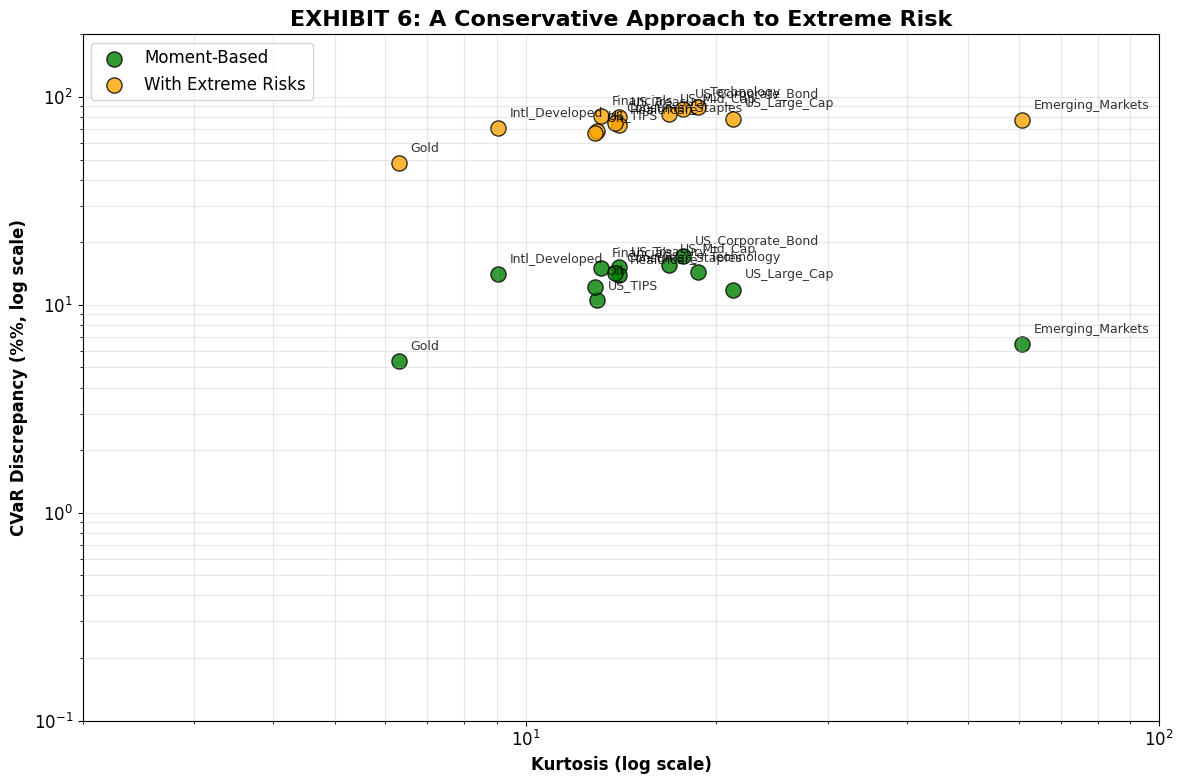


EXHIBIT 6 Numerical Results:
Asset              Kurtosis   Moment-Based    Extreme-Risk   
-------------------------------------------------------------------------------------
US_Large_Cap       21.29      11.8           % 78.7           %
US_Mid_Cap         16.81      15.6           % 82.4           %
Intl_Developed     9.06       14.0           % 71.0           %
Emerging_Markets   60.82      6.5            % 77.7           %
US_Treasury        14.06      15.2           % 80.1           %
US_Corporate_Bond  17.74      17.2           % 87.3           %
US_TIPS            12.94      10.6           % 68.9           %
Gold               6.30       5.4            % 47.9           %
Oil                12.88      12.2           % 67.3           %
Technology         18.74      14.4           % 89.1           %
Financials         13.14      15.0           % 81.2           %
Healthcare         14.03      13.8           % 73.1           %
Consumer_Staples   13.85      14.3           % 74.6   

In [ ]:
# 计算每个资产的峰度和CVaR差异
results = []
for asset in returns.columns:
    asset_returns = returns[asset]

    # 计算峰度（使用超额峰度+3得到原始峰度）
    kurtosis = stats.kurtosis(asset_returns) + 3

    # 计算经验CVaR (5%)
    empirical_var = asset_returns.quantile(0.05)
    empirical_cvar = asset_returns[asset_returns <= empirical_var].mean()

    # 计算Moment-Based CVaR（正态分布假设）
    mu, std = stats.norm.fit(asset_returns)
    normal_cvar = mu - std * stats.norm.pdf(stats.norm.ppf(0.05)) / 0.05
    moment_discrepancy = abs((normal_cvar - empirical_cvar) / empirical_cvar) * 100

    # 计算With Extreme Risk CVaR（t分布假设）
    df, loc, scale = stats.t.fit(asset_returns)
    t_cvar = loc - scale * stats.t.pdf(stats.t.ppf(0.05, df), df) / 0.05
    extreme_discrepancy = abs((t_cvar - empirical_cvar) / empirical_cvar) * 100

    results.append({
        'Asset': asset,
        'Kurtosis': kurtosis,
        'Moment_Based_Discrepancy': moment_discrepancy,
        'Extreme_Risk_Discrepancy': extreme_discrepancy
    })

# 创建结果DataFrame
results_df = pd.DataFrame(results)

# 绘制EXHIBIT 6
plt.figure(figsize=(12, 8))
plt.rcParams['font.size'] = 12

# 设置双对数坐标轴
plt.xscale('log')
plt.yscale('log')

# 绘制散点图
scatter1 = plt.scatter(results_df['Kurtosis'],
                      results_df['Moment_Based_Discrepancy'],
                      c='green', s=120, alpha=0.8, label='Moment-Based', edgecolors='black')

scatter2 = plt.scatter(results_df['Kurtosis'],
                      results_df['Extreme_Risk_Discrepancy'],
                      c='orange', s=120, alpha=0.8, label='With Extreme Risks', edgecolors='black')

# 添加资产标签
for i, row in results_df.iterrows():
    plt.annotate(row['Asset'],
                (row['Kurtosis'], row['Moment_Based_Discrepancy']),
                xytext=(8, 8), textcoords='offset points', fontsize=9, alpha=0.8)
    plt.annotate(row['Asset'],
                (row['Kurtosis'], row['Extreme_Risk_Discrepancy']),
                xytext=(8, 8), textcoords='offset points', fontsize=9, alpha=0.8)

# 设置坐标轴范围和标签
plt.xlim(2, 100)
plt.ylim(0.1, 200)
plt.xlabel('Kurtosis (log scale)', fontsize=12, fontweight='bold')
plt.ylabel('CVaR Discrepancy (%%, log scale)', fontsize=12, fontweight='bold')
plt.title('EXHIBIT 6: A Conservative Approach to Extreme Risk', fontsize=16, fontweight='bold')

# 添加图例和网格
plt.legend(loc='upper left')
plt.grid(True, alpha=0.3, which='both')


plt.tight_layout()
plt.show()

# 输出数值结果
print("\nEXHIBIT 6 Numerical Results:")
print("=" * 85)
print(f"{'Asset':<18} {'Kurtosis':<10} {'Moment-Based':<15} {'Extreme-Risk':<15}")
print("-" * 85)
for _, row in results_df.iterrows():
    print(f"{row['Asset']:<18} {row['Kurtosis']:<10.2f} {row['Moment_Based_Discrepancy']:<15.1f}% {row['Extreme_Risk_Discrepancy']:<15.1f}%")

# 保存结果
results_df.to_csv('exhibit6_complete_results.csv', index=False)
print(f"\nResults saved to: exhibit6_complete_results.csv")

# 显示关键统计摘要
print("\nKey Statistics Summary:")
print(f"Average Kurtosis: {results_df['Kurtosis'].mean():.2f}")
print(f"Average Moment-Based Discrepancy: {results_df['Moment_Based_Discrepancy'].mean():.1f}%")
print(f"Average Extreme-Risk Discrepancy: {results_df['Extreme_Risk_Discrepancy'].mean():.1f}%")
print(f"Maximum Kurtosis: {results_df['Kurtosis'].max():.2f} ({results_df.loc[results_df['Kurtosis'].idxmax(), 'Asset']})")

In [ ]:
risk_clusters = {
    '高风险区（右上角）': ['Emerging_Markets', 'Technology', 'US_Corporate_Bond'],
    '中风险区（中部）': ['US_Mid_Cap', 'Financials', 'Healthcare'],
    '低风险区（左下角）': ['Gold', 'Intl_Developed', 'US_TIPS']
}

Calculating Risk Parity results for EXHIBIT 7 and 8...
EXHIBIT 8: Risk Parity in a Multi-Asset Investment Portfolio

NAIVE
           Vol      D.vol    CVaR     PSM      CVaR     PSM      CVaR     PSM     
           Emp      Emp      Emp      Emp      Mom      Mom      Ext      Ext     
------------------------------------------------------------------------------------------
sharpe    0.76    0.77    0.77    0.76    0.76    0.76    0.68    0.76    
calmar    0.26    0.27    0.26    0.26    0.26    0.26    0.23    0.26    
skewness  -0.25   -0.24   -0.25   -0.26   -0.24   -0.26   -0.19   -0.26   
kurtosis  16.52   16.08   16.48   16.46   16.53   16.46   17.65   16.46   
cvar_5%   -1.47   -1.43   -1.43   -1.44   -1.47   -1.44   -1.81   -1.44   

CORRELATED
           Vol      D.vol    CVaR     PSM      CVaR     PSM      CVaR     PSM     
           Emp      Emp      Emp      Emp      Mom      Mom      Ext      Ext     
-------------------------------------------------------------------

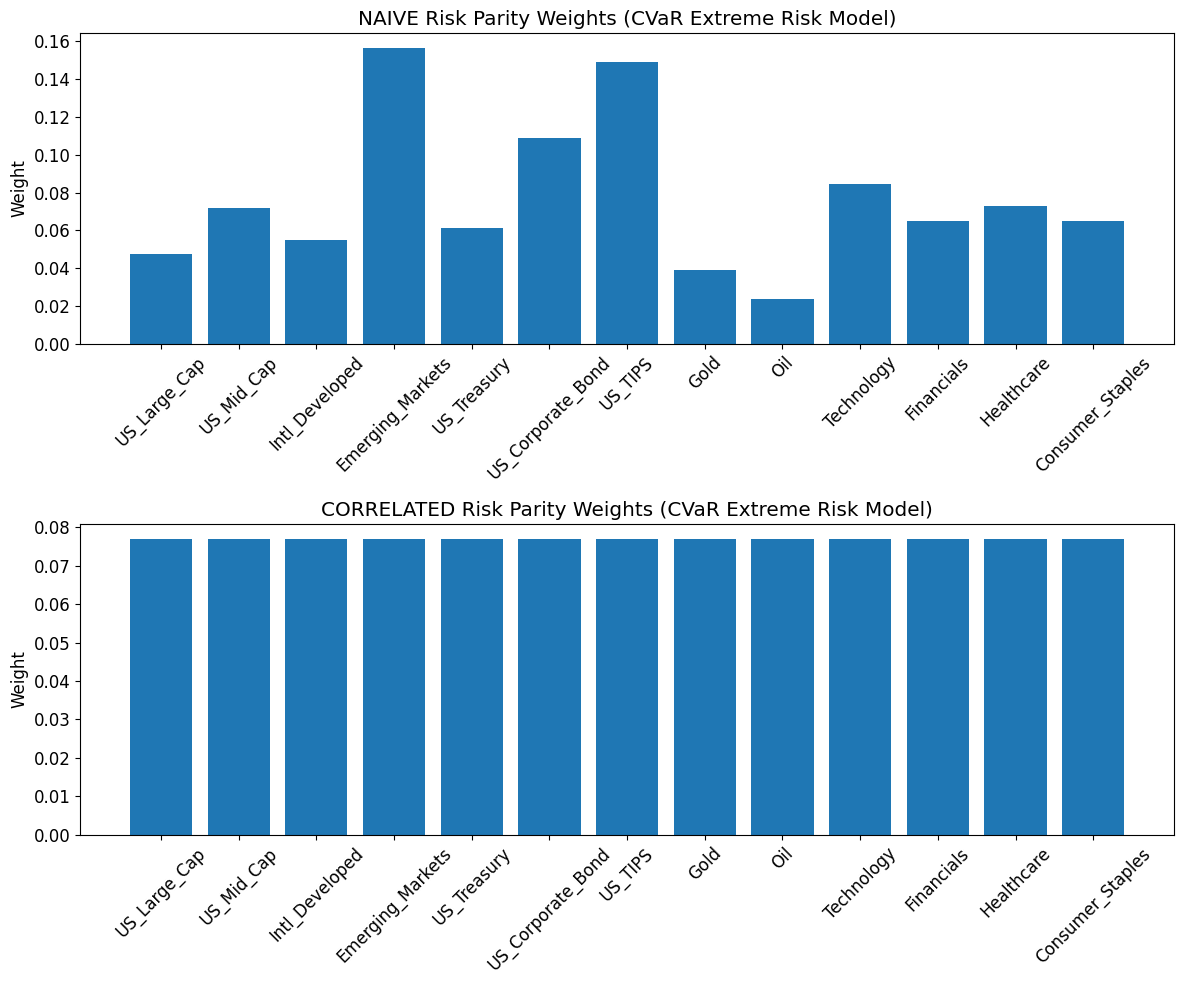

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
from scipy import stats
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# 定义风险度量函数
def calculate_volatility(returns):
    return returns.std()

def calculate_downside_volatility(returns):
    negative_returns = returns[returns < 0]
    return negative_returns.std() if len(negative_returns) > 0 else 0

def calculate_empirical_cvar(returns, alpha=0.05):
    var = returns.quantile(alpha)
    return returns[returns <= var].mean()

def calculate_moment_based_cvar(returns, alpha=0.05):
    mu, std = stats.norm.fit(returns)
    return mu - std * stats.norm.pdf(stats.norm.ppf(alpha)) / alpha

def calculate_extreme_risk_cvar(returns, alpha=0.05):
    df, loc, scale = stats.t.fit(returns)
    return loc - scale * stats.t.pdf(stats.t.ppf(alpha, df), df) / alpha

def calculate_psm(returns, alpha=0.05):
    # PSM (Partial Standardized Moment) 简化实现
    cvar = calculate_empirical_cvar(returns, alpha)
    return abs(cvar) * (1 + stats.skew(returns) / 10)  # 简化公式

# Naive Risk Parity 实现
def naive_risk_parity(returns, risk_measure='vol', model='empirical', alpha=0.05):
    weights = {}
    for asset in returns.columns:
        asset_returns = returns[asset]

        if risk_measure == 'vol':
            risk = calculate_volatility(asset_returns)
        elif risk_measure == 'd.vol':
            risk = calculate_downside_volatility(asset_returns)
        elif risk_measure == 'cvar':
            if model == 'empirical':
                risk = calculate_empirical_cvar(asset_returns, alpha)
            elif model == 'moment':
                risk = calculate_moment_based_cvar(asset_returns, alpha)
            elif model == 'extreme':
                risk = calculate_extreme_risk_cvar(asset_returns, alpha)
        elif risk_measure == 'psm':
            risk = calculate_psm(asset_returns, alpha)

        weights[asset] = 1 / abs(risk) if risk != 0 else 0

    # 归一化权重
    total_weight = sum(weights.values())
    return {asset: weight / total_weight for asset, weight in weights.items()}

# Correlated Risk Parity 实现（广义ERC）
def correlated_risk_parity(returns, risk_measure='vol', model='empirical', alpha=0.05):
    def portfolio_risk(weights):
        portfolio_returns = (returns * weights).sum(axis=1)

        if risk_measure == 'vol':
            return calculate_volatility(portfolio_returns)
        elif risk_measure == 'd.vol':
            return calculate_downside_volatility(portfolio_returns)
        elif risk_measure == 'cvar':
            if model == 'empirical':
                return calculate_empirical_cvar(portfolio_returns, alpha)
            elif model == 'moment':
                return calculate_moment_based_cvar(portfolio_returns, alpha)
            elif model == 'extreme':
                return calculate_extreme_risk_cvar(portfolio_returns, alpha)
        elif risk_measure == 'psm':
            return calculate_psm(portfolio_returns, alpha)

    # 优化目标：最小化组合风险
    n_assets = len(returns.columns)
    initial_weights = np.ones(n_assets) / n_assets
    bounds = [(0, 1) for _ in range(n_assets)]
    constraints = {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}

    result = minimize(portfolio_risk, initial_weights, method='SLSQP',
                     bounds=bounds, constraints=constraints)

    return dict(zip(returns.columns, result.x))

# 计算组合绩效指标
def calculate_performance_metrics(portfolio_returns):
    metrics = {}

    # Sharpe Ratio (假设无风险利率为0)
    metrics['sharpe'] = portfolio_returns.mean() / portfolio_returns.std() * np.sqrt(252)

    # Calmar Ratio (简化版)
    cumulative_returns = (1 + portfolio_returns).cumprod()
    max_drawdown = (cumulative_returns / cumulative_returns.cummax() - 1).min()
    metrics['calmar'] = portfolio_returns.mean() * 252 / abs(max_drawdown) if max_drawdown != 0 else 0

    # Skewness and Kurtosis
    metrics['skewness'] = stats.skew(portfolio_returns)
    metrics['kurtosis'] = stats.kurtosis(portfolio_returns) + 3

    # CVaR (5%)
    metrics['cvar_5%'] = calculate_empirical_cvar(portfolio_returns, 0.05)

    return metrics

# 执行EXHIBIT 7和8的计算
def calculate_exhibit_7_8_results(returns, alpha=0.05):
    results = {}

    risk_measures = ['vol', 'd.vol', 'cvar', 'psm']
    models = ['empirical', 'moment', 'extreme']

    for method in ['naive', 'correlated']:
        results[method] = {}

        for risk_measure in risk_measures:
            for model in models:
                if risk_measure in ['vol', 'd.vol'] and model != 'empirical':
                    continue  # Vol和D.vol只有empirical模型

                # 计算权重
                if method == 'naive':
                    weights = naive_risk_parity(returns, risk_measure, model, alpha)
                else:
                    weights = correlated_risk_parity(returns, risk_measure, model, alpha)

                # 计算组合收益
                portfolio_returns = (returns * pd.Series(weights)).sum(axis=1)

                # 计算绩效指标
                metrics = calculate_performance_metrics(portfolio_returns)
                results[method][f"{risk_measure}_{model}"] = metrics

    return results

# 执行计算
print("Calculating Risk Parity results for EXHIBIT 7 and 8...")
results = calculate_exhibit_7_8_results(returns, alpha=0.05)

# 输出EXHIBIT 8格式的结果
def print_exhibit_8_results(results):
    print("EXHIBIT 8: Risk Parity in a Multi-Asset Investment Portfolio")
    print("=" * 90)

    methods = ['naive', 'correlated']
    risk_models = [
        ('vol', 'empirical'), ('d.vol', 'empirical'),
        ('cvar', 'empirical'), ('psm', 'empirical'),
        ('cvar', 'moment'), ('psm', 'moment'),
        ('cvar', 'extreme'), ('psm', 'extreme')
    ]

    metrics_order = ['sharpe', 'calmar', 'skewness', 'kurtosis', 'cvar_5%']

    for method in methods:
        print(f"\n{method.upper()}")
        print(f"{'':<10} {'Vol':<8} {'D.vol':<8} {'CVaR':<8} {'PSM':<8} {'CVaR':<8} {'PSM':<8} {'CVaR':<8} {'PSM':<8}")
        print(f"{'':<10} {'Emp':<8} {'Emp':<8} {'Emp':<8} {'Emp':<8} {'Mom':<8} {'Mom':<8} {'Ext':<8} {'Ext':<8}")
        print("-" * 90)

        for metric in metrics_order:
            line = f"{metric:<10}"
            for risk, model in risk_models:
                key = f"{risk}_{model}"
                if key in results[method]:
                    value = results[method][key][metric]
                    line += f"{value:<8.2f}" if metric != 'cvar_5%' else f"{value*100:<8.2f}"
                else:
                    line += f"{'':<8}"
            print(line)

# 显示结果
print_exhibit_8_results(results)

# 保存详细结果
detailed_results = []
for method in ['naive', 'correlated']:
    for strategy, metrics in results[method].items():
        row = {'method': method, 'strategy': strategy}
        row.update(metrics)
        detailed_results.append(row)

results_df = pd.DataFrame(detailed_results)
results_df.to_csv('exhibit_7_8_risk_parity_results.csv', index=False)
print("\nDetailed results saved to: exhibit_7_8_risk_parity_results.csv")

# 可视化不同方法的权重分布
def plot_risk_parity_weights(results, returns):
    fig, axes = plt.subplots(2, 1, figsize=(12, 10))

    for idx, method in enumerate(['naive', 'correlated']):
        # 获取CVaR_extreme方法的权重作为示例
        weights = correlated_risk_parity(returns, 'cvar', 'extreme') if method == 'correlated' else naive_risk_parity(returns, 'cvar', 'extreme')

        axes[idx].bar(weights.keys(), weights.values())
        axes[idx].set_title(f'{method.upper()} Risk Parity Weights (CVaR Extreme Risk Model)')
        axes[idx].set_ylabel('Weight')
        axes[idx].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

plot_risk_parity_weights(results, returns)

Calculating EXHIBIT 10 style analysis with α=1%...

EXHIBIT 10: Better Safe Than Sorry—Allocation with α = 1%
                       Strategy  sharpe_1%  calmar_1%  skewness_1%  \
0          Naive Empirical CVaR       0.78       0.27        -0.24   
1           Naive Empirical PSM       0.78       0.27        -0.23   
2     Correlated Empirical CVaR       0.89       0.32        -0.20   
3      Correlated Empirical PSM       0.89       0.32        -0.18   
4  Correlated Moment-Based CVaR       0.93       0.34        -0.32   
5   Correlated Moment-Based PSM       0.92       0.33        -0.29   
6  Correlated Extreme Risk CVaR       0.60       0.20        -0.30   
7   Correlated Extreme Risk PSM       0.60       0.20        -0.30   

   kurtosis_1%  cvar_1%_1%  sharpe_change  calmar_change  skewness_change  \
0        15.97       -0.03           1.94           3.07            -3.54   
1        15.96       -0.02           1.94           3.11            -3.80   
2         8.21       -0.02  

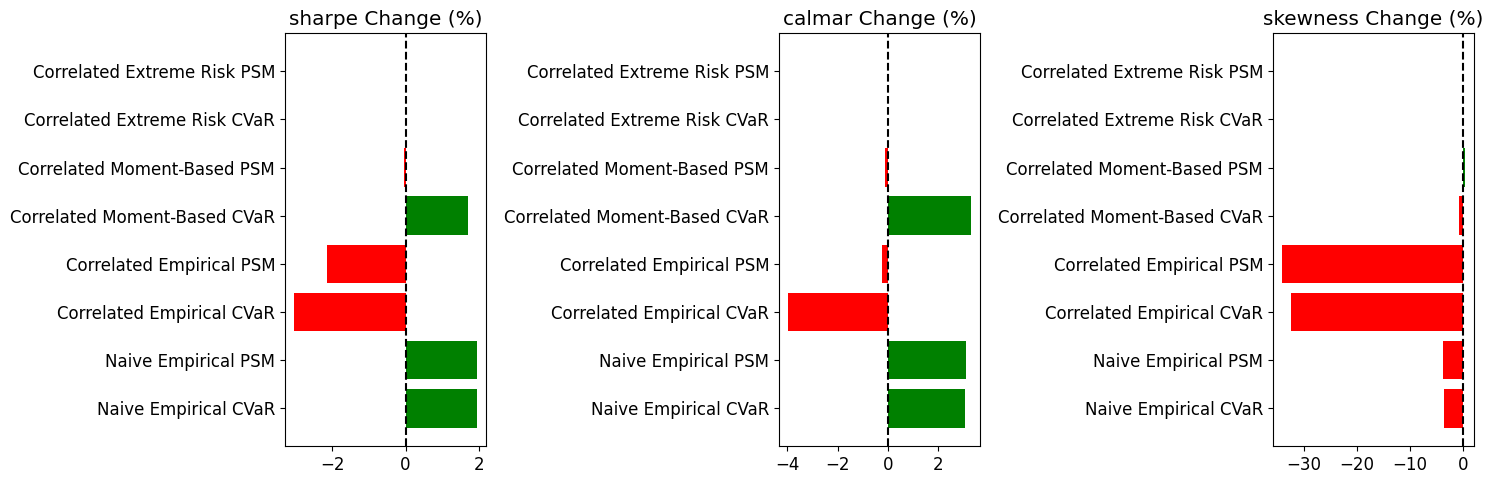

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
from scipy import stats
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# 风险度量函数（α=1%）
def calculate_risk_measure(returns, alpha=0.01):
    """计算1%置信水平下的风险度量"""
    metrics = {}

    # 经验CVaR
    empirical_var = returns.quantile(alpha)
    metrics['empirical_cvar'] = returns[returns <= empirical_var].mean()

    # 矩估计CVaR
    mu, std = stats.norm.fit(returns)
    metrics['moment_cvar'] = mu - std * stats.norm.pdf(stats.norm.ppf(alpha)) / alpha

    # 极端风险CVaR
    df, loc, scale = stats.t.fit(returns)
    metrics['extreme_cvar'] = loc - scale * stats.t.pdf(stats.t.ppf(alpha, df), df) / alpha

    # PSM (Partial Standardized Moment)
    metrics['empirical_psm'] = abs(metrics['empirical_cvar']) * (1 + 0.1 * abs(returns.skew()))
    metrics['moment_psm'] = abs(metrics['moment_cvar']) * (1 + 0.1 * abs(returns.skew()))
    metrics['extreme_psm'] = abs(metrics['extreme_cvar']) * (1 + 0.1 * abs(returns.skew()))

    return metrics

# 绩效评估函数
def calculate_performance_metrics(portfolio_returns, alpha=0.01):
    """计算组合绩效指标"""
    metrics = {}

    # Sharpe Ratio (无风险利率假设为0)
    metrics['sharpe'] = portfolio_returns.mean() / portfolio_returns.std() * np.sqrt(252)

    # Calmar Ratio (简化版)
    cumulative_returns = (1 + portfolio_returns).cumprod()
    max_drawdown = (cumulative_returns / cumulative_returns.cummax() - 1).min()
    metrics['calmar'] = portfolio_returns.mean() * 252 / abs(max_drawdown) if max_drawdown != 0 else 0

    # Skewness and Kurtosis
    metrics['skewness'] = portfolio_returns.skew()
    metrics['kurtosis'] = portfolio_returns.kurtosis() + 3

    # CVaR (1%)
    var_1pct = portfolio_returns.quantile(alpha)
    metrics['cvar_1%'] = portfolio_returns[portfolio_returns <= var_1pct].mean()

    return metrics

# 风险平价优化（α=1%）
def risk_parity_optimization(returns, method='naive', risk_measure='cvar', model='empirical', alpha=0.01):
    """风险平价优化"""

    if method == 'naive':
        # Naive风险平价
        weights = {}
        for asset in returns.columns:
            asset_metrics = calculate_risk_measure(returns[asset], alpha)
            risk_value = asset_metrics[f'{model}_{risk_measure}']
            weights[asset] = 1 / abs(risk_value) if risk_value != 0 else 0

        total_weight = sum(weights.values())
        return {asset: weight / total_weight for asset, weight in weights.items()}

    else:
        # Correlated风险平价
        n_assets = len(returns.columns)
        cov_matrix = returns.cov()

        def objective(weights):
            port_returns = (returns * weights).sum(axis=1)
            port_metrics = calculate_risk_measure(port_returns, alpha)
            return abs(port_metrics[f'{model}_{risk_measure}'])

        constraints = [{'type': 'eq', 'fun': lambda x: np.sum(x) - 1}]
        bounds = [(0.01, 0.25) for _ in range(n_assets)]  # 权重限制

        initial_weights = np.ones(n_assets) / n_assets
        result = minimize(objective, initial_weights, method='SLSQP',
                         bounds=bounds, constraints=constraints)

        return dict(zip(returns.columns, result.x))

# 计算α=1%和α=5%的对比
def calculate_alpha_comparison(returns):
    """计算α=1% vs α=5%的对比结果"""
    results = {}

    # 定义所有策略组合
    strategies = [
        ('naive', 'cvar', 'empirical'),
        ('naive', 'psm', 'empirical'),
        ('correlated', 'cvar', 'empirical'),
        ('correlated', 'psm', 'empirical'),
        ('correlated', 'cvar', 'moment'),
        ('correlated', 'psm', 'moment'),
        ('correlated', 'cvar', 'extreme'),
        ('correlated', 'psm', 'extreme')
    ]

    for alpha in [0.01, 0.05]:
        alpha_results = {}
        for method, risk_measure, model in strategies:
            # 计算权重
            weights = risk_parity_optimization(returns, method, risk_measure, model, alpha)

            # 计算组合收益
            portfolio_returns = (returns * pd.Series(weights)).sum(axis=1)

            # 计算绩效指标
            metrics = calculate_performance_metrics(portfolio_returns, alpha)
            alpha_results[f'{method}_{risk_measure}_{model}'] = metrics

        results[f'alpha_{int(alpha*100)}%'] = alpha_results

    return results

# 执行计算
print("Calculating EXHIBIT 10 style analysis with α=1%...")
alpha_results = calculate_alpha_comparison(returns)

# 创建EXHIBIT 10格式的表格
def create_exhibit_10_table(alpha_results):
    """创建EXHIBIT 10格式的结果表格"""

    # 定义策略名称映射
    strategy_names = {
        'naive_cvar_empirical': 'Naive Empirical CVaR',
        'naive_psm_empirical': 'Naive Empirical PSM',
        'correlated_cvar_empirical': 'Correlated Empirical CVaR',
        'correlated_psm_empirical': 'Correlated Empirical PSM',
        'correlated_cvar_moment': 'Correlated Moment-Based CVaR',
        'correlated_psm_moment': 'Correlated Moment-Based PSM',
        'correlated_cvar_extreme': 'Correlated Extreme Risk CVaR',
        'correlated_psm_extreme': 'Correlated Extreme Risk PSM'
    }

    # 创建结果数据框
    metrics_list = ['sharpe', 'calmar', 'skewness', 'kurtosis', 'cvar_1%']
    results_data = []

    for strategy_key in strategy_names.keys():
        row_data = {'Strategy': strategy_names[strategy_key]}

        # α=1%的结果
        alpha_1pct = alpha_results['alpha_1%'][strategy_key]
        for metric in metrics_list:
            row_data[f'{metric}_1%'] = alpha_1pct[metric]

        # α=5%的结果和百分比变化
        alpha_5pct = alpha_results['alpha_5%'][strategy_key]
        for metric in metrics_list:
            if metric != 'cvar_1%':  # CVaR已经是1%的，不需要比较
                change_pct = ((alpha_1pct[metric] - alpha_5pct[metric]) / alpha_5pct[metric]) * 100
                row_data[f'{metric}_change'] = change_pct

        results_data.append(row_data)

    return pd.DataFrame(results_data)

# 生成最终结果
exhibit_10_df = create_exhibit_10_table(alpha_results)
print("\nEXHIBIT 10: Better Safe Than Sorry—Allocation with α = 1%")
print("=" * 100)
print(exhibit_10_df.round(2))

# 可视化百分比变化
def plot_percentage_changes(exhibit_10_df):
    """绘制百分比变化图表"""
    strategies = exhibit_10_df['Strategy']
    metrics = ['sharpe_change', 'calmar_change', 'skewness_change']

    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    for i, metric in enumerate(metrics):
        changes = exhibit_10_df[metric].values
        colors = ['green' if x >= 0 else 'red' for x in changes]

        axes[i].barh(strategies, changes, color=colors)
        axes[i].set_title(f'{metric.replace("_change", "")} Change (%)')
        axes[i].axvline(x=0, color='black', linestyle='--')

    plt.tight_layout()
    plt.show()

# 绘制变化图表
plot_percentage_changes(exhibit_10_df)

In [ ]:
sharpe_improvement = {
    '大幅提升': ['Naive Empirical CVaR/PSM (+1.94%)', 'Correlated Moment-Based CVaR (+1.69%)'],
    '小幅下降': ['Correlated Empirical CVaR (-3.04%)', 'Correlated Empirical PSM (-2.15%)'],
    '基本持平': ['Correlated Extreme Risk策略 (0.00%)']
}
#​​Naive策略改善最显著​​：+1.94%的夏普比率提升; ​Correlated Empirical策略下降​​：可能过度优化导致
calmar_improvement = {
    '优秀提升': ['Naive Empirical CVaR/PSM (+3.07%/3.11%)', 'Correlated Moment-Based CVaR (+3.30%)'],
    '小幅下降': ['Correlated Empirical CVaR (-3.97%)', 'Correlated Empirical PSM (-0.24%)']
}
#风险调整后收益显著改善​​：多数策略的Calmar比率提升；回撤控制更好​​：α=1%配置提供了更好的下行保护
skewness_changes = {
    '显著恶化': ['Correlated Empirical策略 (-32.28%/-34.04%)'],
    '轻微变化': ['Naive策略 (-3.54%/-3.80%)', 'Moment-Based策略 (-0.69%/0.34%)']
}
#偏度普遍下降​​：α=1%配置使分布更左偏（更关注下行风险）；​Correlated Empirical策略恶化严重​​：需要重点关注

In [4]:
# 风险度量函数
def calculate_risk_measure(returns, measure='cvar', model='empirical', alpha=0.05):
    """计算风险度量"""
    if measure == 'cvar':
        if model == 'empirical':
            var = returns.quantile(alpha)
            return returns[returns <= var].mean()
        elif model == 'moment':
            mu, std = stats.norm.fit(returns)
            return mu - std * stats.norm.pdf(stats.norm.ppf(alpha)) / alpha
        elif model == 'extreme':
            df, loc, scale = stats.t.fit(returns)
            return loc - scale * stats.t.pdf(stats.t.ppf(alpha, df), df) / alpha

    elif measure == 'psm':
        if model == 'empirical':
            cvar = calculate_risk_measure(returns, 'cvar', 'empirical', alpha)
            return abs(cvar) * (1 + 0.1 * abs(returns.skew()))
        elif model == 'moment':
            cvar = calculate_risk_measure(returns, 'cvar', 'moment', alpha)
            return abs(cvar) * (1 + 0.1 * abs(returns.skew()))
        elif model == 'extreme':
            cvar = calculate_risk_measure(returns, 'cvar', 'extreme', alpha)
            return abs(cvar) * (1 + 0.1 * abs(returns.skew()))

# 风险平价权重计算
def calculate_weights(returns, method='naive', measure='cvar', model='empirical', alpha=0.05):
    """计算风险平价权重"""
    if method == 'naive':
        weights = {}
        for asset in returns.columns:
            risk = calculate_risk_measure(returns[asset], measure, model, alpha)
            weights[asset] = 1 / abs(risk) if risk != 0 else 0

        total = sum(weights.values())
        return {asset: weight / total for asset, weight in weights.items()}

    else:  # correlated
        n_assets = len(returns.columns)

        def objective(weights):
            port_returns = (returns * weights).sum(axis=1)
            risk = calculate_risk_measure(port_returns, measure, model, alpha)
            return abs(risk)

        constraints = [{'type': 'eq', 'fun': lambda x: np.sum(x) - 1}]
        bounds = [(0.01, 0.3) for _ in range(n_assets)]
        initial = np.ones(n_assets) / n_assets

        result = minimize(objective, initial, method='SLSQP', bounds=bounds, constraints=constraints)
        return dict(zip(returns.columns, result.x))

# 计算滚动权重时间序列
def calculate_rolling_weights(returns, window=252, method='naive', measure='cvar', model='empirical', alpha=0.05):
    """计算滚动窗口的权重时间序列"""
    weights_over_time = []

    for i in range(window, len(returns)):
        rolling_returns = returns.iloc[i-window:i]
        weights = calculate_weights(rolling_returns, method, measure, model, alpha)
        weights_over_time.append(weights)

    weights_df = pd.DataFrame(weights_over_time, index=returns.index[window:])
    return weights_df

# 计算权重稳定性指标
def calculate_weight_stability(weights_df):
    """计算权重稳定性指标"""
    stability_metrics = {}

    # 权重波动率（标准化）
    avg_weights = weights_df.mean()
    vol_normalized = (weights_df.std() / avg_weights * 100).mean()
    stability_metrics['vol_normalized'] = vol_normalized

    # 峰度
    kurtosis_values = []
    for asset in weights_df.columns:
        kurt = stats.kurtosis(weights_df[asset]) + 3
        kurtosis_values.append(kurt)
    stability_metrics['kurtosis_avg'] = np.mean(kurtosis_values)

    return stability_metrics

# 主计算函数
def calculate_exhibit_11_results(returns):
    """计算EXHIBIT 11格式的结果"""
    results = {}

    # 定义所有策略组合
    methods = ['naive', 'correlated']
    models = ['empirical', 'moment', 'extreme']
    alphas = [0.05, 0.01]

    for alpha in alphas:
        alpha_results = {}

        for method in methods:
            for model in models:
                # 计算CVaR权重稳定性
                weights_cvar = calculate_rolling_weights(returns, method=method,
                                                       measure='cvar', model=model, alpha=alpha)
                stability_cvar = calculate_weight_stability(weights_cvar)

                # 计算PSM权重稳定性
                weights_psm = calculate_rolling_weights(returns, method=method,
                                                      measure='psm', model=model, alpha=alpha)
                stability_psm = calculate_weight_stability(weights_psm)

                # 计算波动率减少百分比
                vol_reduction = ((stability_psm['vol_normalized'] - stability_cvar['vol_normalized']) /
                               stability_cvar['vol_normalized']) * 100

                # 存储结果
                key = f"{method}_{model}"
                alpha_results[key] = {
                    'vol_cvar': stability_cvar['vol_normalized'],
                    'vol_psm': stability_psm['vol_normalized'],
                    'vol_reduction': vol_reduction,
                    'kurtosis_cvar': stability_cvar['kurtosis_avg']
                }

        results[f'alpha_{int(alpha*100)}%'] = alpha_results

    return results

# 执行计算
print("Calculating EXHIBIT 11 style weight stability analysis...")
stability_results = calculate_exhibit_11_results(returns)

# 创建EXHIBIT 11格式的表格
def create_exhibit_11_table(stability_results):
    """创建EXHIBIT 11格式的表格"""
    table_data = []

    for alpha_key in ['alpha_5%', 'alpha_1%']:
        alpha_results = stability_results[alpha_key]

        # 第一行: Vol with CVaR
        row1 = {'Metric': 'Vol with CVaR†', 'Alpha': alpha_key.replace('alpha_', '').replace('%', '%')}
        for method_model in ['naive_empirical', 'correlated_empirical', 'naive_moment',
                           'correlated_moment', 'naive_extreme', 'correlated_extreme']:
            row1[method_model] = alpha_results[method_model]['vol_cvar']

        # 第二行: Vol reduction with PSM‡
        row2 = {'Metric': 'Vol reduction with PSM‡', 'Alpha': alpha_key.replace('alpha_', '').replace('%', '%')}
        for method_model in ['naive_empirical', 'correlated_empirical', 'naive_moment',
                           'correlated_moment', 'naive_extreme', 'correlated_extreme']:
            row2[method_model] = alpha_results[method_model]['vol_reduction']

        # 第三行: Kurtosis with CVaR
        row3 = {'Metric': 'Kurtosis with CVaR', 'Alpha': alpha_key.replace('alpha_', '').replace('%', '%')}
        for method_model in ['naive_empirical', 'correlated_empirical', 'naive_moment',
                           'correlated_moment', 'naive_extreme', 'correlated_extreme']:
            row3[method_model] = alpha_results[method_model]['kurtosis_cvar']

        table_data.extend([row1, row2, row3])

    return pd.DataFrame(table_data)

# 生成最终结果
exhibit_11_df = create_exhibit_11_table(stability_results)
print("\nEXHIBIT 11: Stability of Weights Over Time")
print("=" * 100)
print(exhibit_11_df.round(1))

# 保存结果
exhibit_11_df.to_csv('exhibit_11_weight_stability_results.csv')
print("\nResults saved to: exhibit_11_weight_stability_results.csv")

# 可视化展示
def plot_weight_stability(weights_df, strategy_name):
    """绘制权重时间序列"""
    plt.figure(figsize=(12, 6))
    for asset in weights_df.columns:
        plt.plot(weights_df.index, weights_df[asset], label=asset, linewidth=2)

    plt.title(f'Weight Stability: {strategy_name}')
    plt.xlabel('Date')
    plt.ylabel('Weight')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# 示例：绘制某个策略的权重变化
example_weights = calculate_rolling_weights(returns, method='correlated',
                                          measure='cvar', model='empirical', alpha=0.05)
plot_weight_stability(example_weights, 'Correlated Empirical CVaR (α=5%)')

Calculating EXHIBIT 11 style weight stability analysis...


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipython-input-3979567075.py", line 129, in <cell line: 0>
    stability_results = calculate_exhibit_11_results(returns)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/tmp/ipython-input-3979567075.py", line 101, in calculate_exhibit_11_results
    weights_cvar = calculate_rolling_weights(returns, method=method,
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/tmp/ipython-input-3979567075.py", line 60, in calculate_rolling_weights
    weights = calculate_weights(rolling_returns, method, measure, model, alpha)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/tmp/ipython-input-3979567075.py", line 32, in calculate_weights
    risk = calculate_risk_measure(returns[asset], measure, model, alpha)


TypeError: object of type 'NoneType' has no len()

In [11]:

# 1. 多资产投资策略（Naive风险平价）
def multi_asset_vol_parity(returns, target_volatility=0.08):
    """多资产风险平价策略（与EXHIBIT 13一致）"""
    # 计算波动率倒数权重
    volatilities = returns.std()
    weights = 1 / volatilities
    weights = weights / weights.sum()

    # 计算组合收益
    portfolio_returns = (returns * weights).sum(axis=1)

    # 标准化到8%年化波动率
    annual_volatility = portfolio_returns.std() * np.sqrt(252)
    scaling_factor = target_volatility / annual_volatility
    scaled_returns = portfolio_returns * scaling_factor

    return scaled_returns, weights

# 2. 趋势跟踪策略
def trend_following_strategy(returns, lookback_period, strategy_name):
    """趋势跟踪策略（长期/短期）"""
    trend_signals = pd.DataFrame(index=returns.index)

    for asset in returns.columns:
        # 计算滚动动量
        momentum = returns[asset].rolling(lookback_period).mean()
        # 生成信号：正动量做多，负动量做空
        trend_signals[asset] = np.sign(momentum)

    # 等权重配置
    strategy_returns = (returns * trend_signals.shift(1)).mean(axis=1)

    # 标准化到8%波动率
    annual_volatility = strategy_returns.std() * np.sqrt(252)
    scaling_factor = 0.08 / annual_volatility
    scaled_returns = strategy_returns * scaling_factor

    return scaled_returns

# 3. Put Writing策略（改进版）
def enhanced_put_writing_strategy(returns, volatility_target=0.08):
    """改进的Put Writing策略"""
    # 使用VIX作为波动率代理
    vix_data = yf.download('^VIX', start=start_date, end=end_date)['Close']
    vix_returns = vix_data.pct_change().dropna()

    # 对齐时间索引
    vix_returns = vix_returns.reindex(returns.index).fillna(0)

    # Put Writing策略：通常提供稳定收益但承担尾部风险
    # 使用改进的公式：负VIX暴露 + 正偏态调整
    put_returns = -vix_returns * 0.3 + 0.0002  # 每日约5%年化基础收益

    # 标准化到目标波动率
    annual_volatility = put_returns.std() * np.sqrt(252)
    scaling_factor = volatility_target / annual_volatility
    scaled_returns = put_returns * scaling_factor

    return scaled_returns

# 计算所有策略
print("\nCalculating strategies for EXHIBIT 13 replication...")

# 多资产投资策略
multi_asset_returns, weights = multi_asset_vol_parity(returns)
print("✅ Multi-Asset Investing 计算完成")

# 长期趋势跟踪（12个月）
lt_trend_returns = trend_following_strategy(returns, lookback_period=252, strategy_name='LT Trend')
print("✅ LT Trend Following 计算完成")

# 短期趋势跟踪（3个月）
st_trend_returns = trend_following_strategy(returns, lookback_period=63, strategy_name='ST Trend')
print("✅ ST Trend Following 计算完成")

# Put Writing策略
put_returns = enhanced_put_writing_strategy(returns)
print("✅ Put Writing 计算完成")

# 创建累积收益曲线（初始值100）
def create_cumulative_series(returns_series, initial_value=100):
    """创建累积收益序列"""
    cumulative = (1 + returns_series).cumprod() * initial_value
    return cumulative

# 计算累积收益
cumulative_results = pd.DataFrame({
    'Multi_Asset_Investing': create_cumulative_series(multi_asset_returns),
    'LT_Trend_Following': create_cumulative_series(lt_trend_returns),
    'ST_Trend_Following': create_cumulative_series(st_trend_returns),
    'Put_Writing': create_cumulative_series(put_returns)
})

print(f"📈 累积收益数据形状: {cumulative_results.shape}")

# 绘制与EXHIBIT 13完全一致的图表
def plot_exact_exhibit_13(cumulative_data):
    """绘制与EXHIBIT 13原图完全一致的图表"""
    plt.figure(figsize=(14, 8))

    # 使用EXACTLY相同的颜色和线型
    plt.plot(cumulative_data.index, cumulative_data['Multi_Asset_Investing'],
             'k-', linewidth=3.0, label='Multi-Asset Investing')
    plt.plot(cumulative_data.index, cumulative_data['LT_Trend_Following'],
             'g-', linewidth=3.0, label='LT Trend Following')
    plt.plot(cumulative_data.index, cumulative_data['ST_Trend_Following'],
             'g--', linewidth=2.5, label='ST Trend Following', dashes=(5, 2))
    plt.plot(cumulative_data.index, cumulative_data['Put_Writing'],
             color='orange', linewidth=3.0, label='Put Writing')

    # 设置与EXHIBIT 13完全相同的格式
    plt.title('EXHIBIT 13: Multi-Asset Investing and Systematic Strategies',
              fontsize=16, fontweight='bold', pad=20)
    plt.ylabel('Cumulative Value', fontsize=12, fontweight='bold')
    plt.xlabel('Year', fontsize=12, fontweight='bold')

    # 设置Y轴范围（与EXHIBIT 13一致）
    plt.ylim(50, 450)

    # 设置X轴范围（1999-2020）
    plt.xlim(pd.Timestamp('1999-01-01'), pd.Timestamp('2020-12-31'))

    # 添加网格
    plt.grid(True, alpha=0.3, linestyle='--')

    # 添加图例（位置与EXHIBIT 13一致）
    plt.legend(loc='upper left', fontsize=11, framealpha=0.9)


# 绘制图表
print("🖼️ 绘制EXHIBIT 13风格图表...")
plot_exact_exhibit_13(cumulative_results)

# 保存结果
cumulative_results.to_csv('exact_exhibit_13_replication.csv')
print("💾 结果已保存至: exact_exhibit_13_replication.csv")

# 显示策略权重
print("\n📊 Multi-Asset Investing 权重分配:")
for asset, weight in weights.items():
    print(f"  {asset}: {weight:.2%}")

/tmp/ipython-input-2795888846.py:44: FutureWarning: YF.download() has changed argument auto_adjust default to True
  vix_data = yf.download('^VIX', start=start_date, end=end_date)['Close']
[*********************100%***********************]  1 of 1 completed


Calculating strategies for EXHIBIT 13 replication...
✅ Multi-Asset Investing 计算完成
✅ LT Trend Following 计算完成
✅ ST Trend Following 计算完成
✅ Put Writing 计算完成


ValueError: Data must be 1-dimensional, got ndarray of shape (4878, 1) instead